In [2]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import glob

In [95]:
#tf = uproot.open("/home/joosep/CMSSW_14_1_0_pre4/samples/singlepiminus/pfntuple.root")

arrs = [
    "genmet_pt",
    "gen_pt", "gen_phi", "gen_status", "gen_pdgid", "gen_daughters",
    "element_type", "element_energy",
    "trackingparticle_pt", "trackingparticle_pid", "trackingparticle_to_element",
    "caloparticle_pt", "caloparticle_phi", "caloparticle_pid",
    "caloparticle_ev", "caloparticle_bx",
    "caloparticle_idx_trackingparticle", "caloparticle_to_element"
    
]

tt = uproot.concatenate("/media/joosep/data/cms/v3_3/nopu/SingleProtonMinusFlatPt0p7To1000_cfi/root/pfntuple_*.root:pfana/pftree", arrs)
sample_title = "SingleProtonMinus"


#sample_title = "ttbar+noPU"
#sample_title = "SingleEle"
#sample_title = "SingleGamma"
#sample_title = "SingleNeutron"
#sample_title = "SinglePi0"
#sample_title = "SinglePiMinus"
#sample_title = "SingleProtonMinus"


In [96]:
gen = tt[["gen_pt", "gen_phi", "gen_status", "gen_pdgid", "gen_daughters"]]
gen_num_dau = ak.num(gen["gen_daughters"], axis=2)
genmet_cmssw = tt["genmet_pt"][:, 0]

In [97]:
gen_for_met = (
    ((gen["gen_status"]==1) & ~((np.abs(gen["gen_pdgid"])==12) | (np.abs(gen["gen_pdgid"])==14) | (np.abs(gen["gen_pdgid"])==16)))
)
gen_stable_pt = gen["gen_pt"][gen_for_met]
gen_stable_phi = gen["gen_phi"][gen_for_met]
gen_stable_pdgid = gen["gen_pdgid"][gen_for_met]

gen_stable_sumpx = ak.sum(gen_stable_pt*np.cos(gen_stable_phi), axis=1)
gen_stable_sumpy = ak.sum(gen_stable_pt*np.sin(gen_stable_phi), axis=1)

genmet_pythia = np.sqrt(gen_stable_sumpx**2 + gen_stable_sumpy**2)

In [98]:
met_diff = genmet_pythia - genmet_cmssw
np.min(met_diff), np.max(met_diff)

(-6.1035156e-05, 6.1035156e-05)

Text(0.5, 1.0, 'SingleProtonMinus')

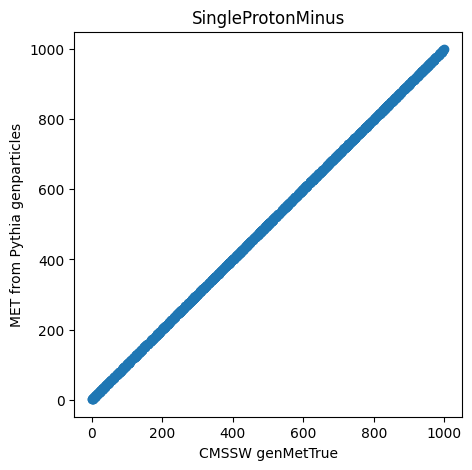

In [99]:
plt.figure(figsize=(5,5))
plt.scatter(genmet_cmssw, genmet_pythia)
plt.xlabel("CMSSW genMetTrue")
plt.ylabel("MET from Pythia genparticles")
plt.title(sample_title)

Text(0.5, 1.0, 'SingleProtonMinus')

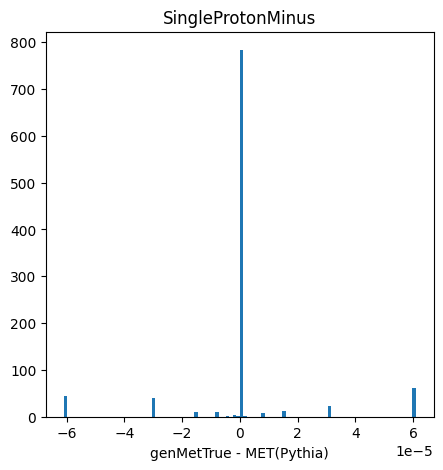

In [100]:
plt.figure(figsize=(5,5))
plt.hist(met_diff, bins=100);
plt.xlabel("genMetTrue - MET(Pythia)")
plt.title(sample_title)

In [101]:
element = tt[["element_type", "element_energy"]]

In [102]:
trackingparticle = tt[["trackingparticle_pt", "trackingparticle_pid", "trackingparticle_to_element"]]
caloparticle = tt[["caloparticle_pt", "caloparticle_phi", "caloparticle_pid", "caloparticle_idx_trackingparticle", "caloparticle_to_element", "caloparticle_ev"]]

visible_cp = np.abs(caloparticle["caloparticle_pid"])!=15
nopu_cp = caloparticle["caloparticle_ev"]==0

cp_visible_pt = caloparticle["caloparticle_pt"][visible_cp]
cp_visible_phi = caloparticle["caloparticle_phi"][visible_cp]
cp_visible_sumpx = ak.sum(cp_visible_pt*np.cos(cp_visible_phi), axis=1)
cp_visible_sumpy = ak.sum(cp_visible_pt*np.sin(cp_visible_phi), axis=1)
genmet_cp_visible = np.sqrt(cp_visible_sumpx**2 + cp_visible_sumpy**2)


cp_visible_nopu_pt = caloparticle["caloparticle_pt"][visible_cp & nopu_cp]
cp_visible_nopu_phi = caloparticle["caloparticle_phi"][visible_cp & nopu_cp]
cp_visible_nopu_sumpx = ak.sum(cp_visible_nopu_pt*np.cos(cp_visible_nopu_phi), axis=1)
cp_visible_nopu_sumpy = ak.sum(cp_visible_nopu_pt*np.sin(cp_visible_nopu_phi), axis=1)
genmet_cp_visible_nopu = np.sqrt(cp_visible_nopu_sumpx**2 + cp_visible_nopu_sumpy**2)

Text(0.5, 1.0, 'SingleProtonMinus')

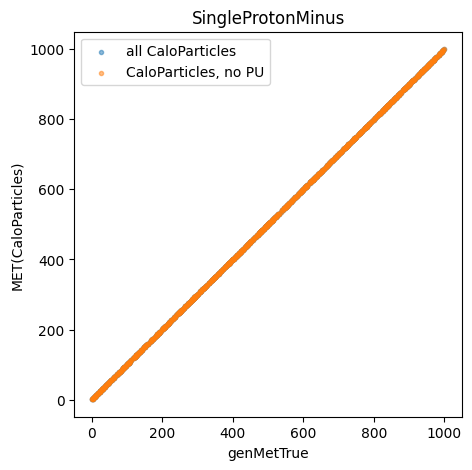

In [103]:
plt.figure(figsize=(5,5))
plt.scatter(genmet_cmssw, genmet_cp_visible, marker=".", alpha=0.5, label="all CaloParticles")
plt.scatter(genmet_cmssw, genmet_cp_visible_nopu, marker=".", alpha=0.5, label="CaloParticles, no PU")
plt.legend(loc="best")
plt.xlabel("genMetTrue")
plt.ylabel("MET(CaloParticles)")
plt.title(sample_title)

Text(0.5, 1.0, 'SingleProtonMinus, genMetTrue<1 GeV')

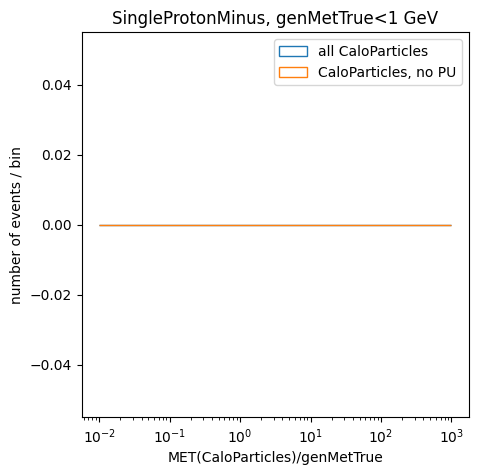

In [104]:
plt.figure(figsize=(5,5))
b = np.logspace(-2,3,100)
msk_small_met = genmet_cmssw<1
plt.hist(genmet_cp_visible[msk_small_met]/genmet_cmssw[msk_small_met], bins=b, histtype="step", lw=1, label="all CaloParticles")
plt.hist(genmet_cp_visible_nopu[msk_small_met]/genmet_cmssw[msk_small_met], bins=b, histtype="step", lw=1, label="CaloParticles, no PU")
plt.xscale("log")
#plt.yscale("log")
plt.legend(loc="best")
plt.xlabel("MET(CaloParticles)/genMetTrue")
plt.ylabel("number of events / bin")
plt.title(sample_title + ", genMetTrue<1 GeV")

Text(0.5, 1.0, 'SinglePiMinus, genMetTrue>1 GeV')

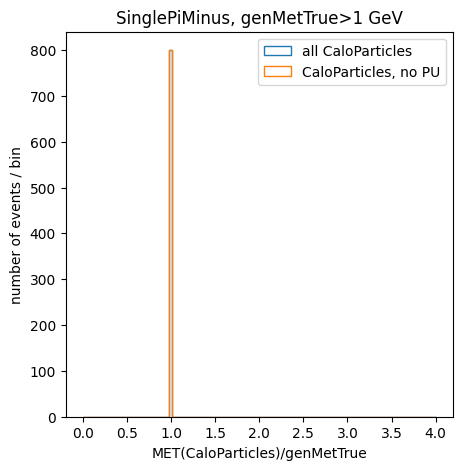

In [94]:
plt.figure(figsize=(5,5))
b = np.linspace(0,4,100)
msk_large_met = genmet_cmssw>1
plt.hist(genmet_cp_visible[msk_large_met]/genmet_cmssw[msk_large_met], bins=b, histtype="step", lw=1, label="all CaloParticles")
plt.hist(genmet_cp_visible_nopu[msk_large_met]/genmet_cmssw[msk_large_met], bins=b, histtype="step", lw=1, label="CaloParticles, no PU")
#plt.xscale("log")
#plt.yscale("log")
plt.legend(loc="best")
plt.xlabel("MET(CaloParticles)/genMetTrue")
plt.ylabel("number of events / bin")
plt.title(sample_title + ", genMetTrue>1 GeV")